In [2]:
import pandas as pd


df = pd.read_csv('Titanic-Dataset.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
import pandas as pd


df = pd.read_csv('Titanic-Dataset.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
['male' 'female']
['S' 'C' 'Q' nan]


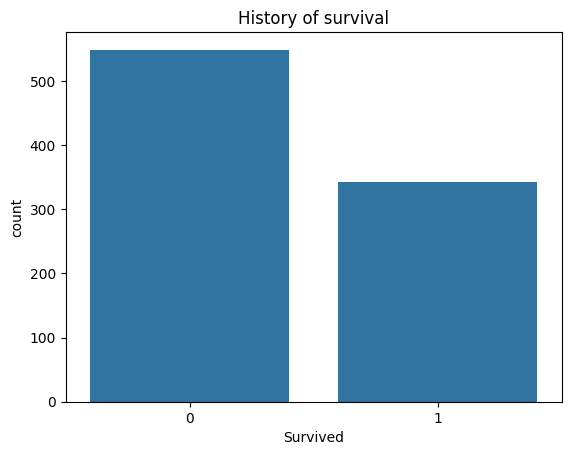

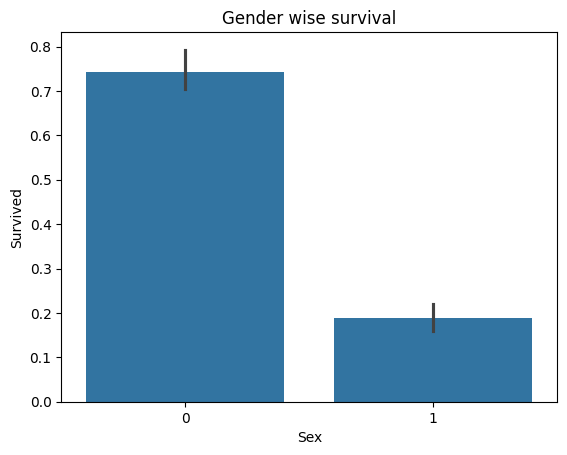

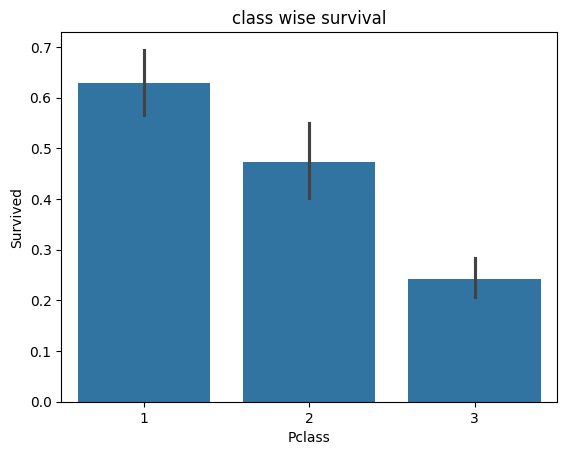

Accuracy: 0.8100558659217877

Confusion Matrix:
 [[92 13]
 [21 53]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder

df=pd.read_csv('Titanic-Dataset.csv')
df.head()
df.info()
df.describe()
df.isnull().sum()
print(df['Sex'].unique())
print(df['Embarked'].unique())

df['Age']=df['Age'].fillna(df['Age'].mean())
df['Fare']=df['Fare'].fillna(df['Fare'].mean())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
if 'Cabin' in df.columns:
  df.drop(['Cabin'],axis=1,inplace=True)

le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])

sns.countplot(x='Survived',data=df)
plt.title('History of survival')
plt.show()
sns.barplot(x='Sex',y='Survived',data=df)
plt.title('Gender wise survival')
plt.show()

sns.barplot(x='Pclass',y='Survived',data=df)
plt.title('class wise survival')
plt.show()

x=df[['Pclass','Sex','Age','Fare','SibSp','Parch']]
y=df['Survived']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy:", accuracy_score(y_test,y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))



